In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import load_model



In [1]:
year_2021 = pd.read_csv('Data_PY/DATA_2021.csv')
year_train = year_2021[:282]

year_test = year_2021[283:]

NameError: name 'pd' is not defined

In [6]:
#Train value
Nhiet_do_training = year_train.drop(['YYYY','MM','DD','TIME','DOMAN','PH','NH3','H2S','TSS','DO','COD'], axis = 1)
Do_man_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','PH','NH3','H2S','TSS','DO','COD'], axis = 1)
PH_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','H2S','TSS','DO','COD'], axis = 1)
NH3_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','H2S','TSS','DO','COD'], axis = 1)
H2S_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','TSS','DO','COD'], axis = 1)
TSS_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','DO','COD'], axis = 1)
DO_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','TSS','COD'], axis = 1)
COD_training = year_train.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','TSS','DO'], axis = 1)


In [7]:
Do_man_training

,DOMAN
0,30.0
1,17.0
2,28.0
3,26.0
4,35.0
...,...
277,35.0
278,35.0
279,35.0
280,35.0


In [8]:
#Test value
Nhiet_do_test = year_test.drop(['YYYY','MM','DD','TIME','DOMAN','PH','NH3','H2S','TSS','DO','COD'], axis = 1)
Do_man_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','PH','NH3','H2S','TSS','DO','COD'], axis = 1)
PH_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','NH3','H2S','TSS','DO','COD'], axis = 1)
NH3_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','H2S','TSS','DO','COD'], axis = 1)
H2S_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','TSS','DO','COD'], axis = 1)
TSS_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','DO','COD'], axis = 1)
DO_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','TSS','COD'], axis = 1)
COD_test = year_test.drop(['YYYY','MM','DD','TIME','TEMP','DOMAN','PH','NH3','H2S','TSS','DO'], axis = 1)


In [9]:
Do_man_test

,DOMAN
283,25.0
284,25.0
285,7.0
286,6.0
287,34.0
...,...
372,35.0
373,35.0
374,30.0
375,31.0


In [13]:
#scaler train
Nhiet_do = MinMaxScaler()
Do_man = MinMaxScaler()
PH = MinMaxScaler()
NH3 = MinMaxScaler()
H2S= MinMaxScaler()
TSS = MinMaxScaler()
DO = MinMaxScaler()
COD = MinMaxScaler()

In [14]:
Nhiet_do_training = Nhiet_do.fit_transform(Nhiet_do_training)
Do_man_training = Do_man.fit_transform(Do_man_training)
PH_training = PH.fit_transform(PH_training)
NH3_training = NH3.fit_transform(NH3_training)
H2S_training = H2S.fit_transform(H2S_training)
TSS_training = TSS.fit_transform(TSS_training)
DO_training = DO.fit_transform(DO_training)
COD_training = COD.fit_transform(COD_training)

In [18]:
Nhiet_do_training

array([[0.85714286],
       [0.92857143],
       [0.85714286],
       [0.78571429],
       [0.92857143],
       [0.89285714],
       [0.85714286],
       [0.64285714],
       [0.85714286],
       [0.92857143],
       [0.85714286],
       [0.82142857],
       [0.85714286],
       [0.92857143],
       [0.89285714],
       [0.85714286],
       [0.85714286],
       [0.64285714],
       [0.64285714],
       [0.92857143],
       [0.92857143],
       [0.92857143],
       [0.64285714],
       [0.92857143],
       [0.85714286],
       [0.64285714],
       [0.64285714],
       [0.85714286],
       [0.78571429],
       [0.71428571],
       [0.85714286],
       [0.        ],
       [0.64285714],
       [0.85714286],
       [0.64285714],
       [0.57142857],
       [0.78571429],
       [0.71428571],
       [0.78571429],
       [0.78571429],
       [0.71428571],
       [0.71428571],
       [0.78571429],
       [0.85714286],
       [0.71428571],
       [0.60714286],
       [0.57142857],
       [0.928

In [19]:
#Nhiet_do_X_train, Nhiet_do_y_train -> training
def get_X_y(data_training):
   X_train = []
   y_train = []

   #60 input predict 1 output
   for i in range(60,data_training.shape[0]):
        X_train.append(data_training[i-60:i])
        y_train.append(data_training[i,0])

    #chuyen ve array
   X_train = np.array(X_train)
   y_train = np.array(y_train)

   return X_train, y_train


In [20]:
#Train Value
Nhiet_do_X_train, Nhiet_do_y_train = get_X_y(Nhiet_do_training)
Do_man_X_train, Do_man_y_train = get_X_y(Do_man_training)
PH_X_train, PH_y_train = get_X_y(PH_training)
NH3_X_train, NH3_y_train = get_X_y(NH3_training)
H2S_X_train, H2S_y_train = get_X_y(H2S_training)
TSS_X_train, TSS_y_train = get_X_y(TSS_training)
DO_X_train, DO_y_train = get_X_y(DO_training)
COD_X_train, COD_y_train = get_X_y(COD_training)


In [21]:
Nhiet_do_X_train.shape


(222, 60, 1)

In [22]:
Nhiet_do_test = Nhiet_do.fit_transform(Nhiet_do_test)
Do_man_test = Do_man.fit_transform(Do_man_test)
PH_test = PH.fit_transform(PH_test)
NH3_test = NH3.fit_transform(NH3_test)
H2S_test = H2S.fit_transform(H2S_test)
TSS_test = TSS.fit_transform(TSS_test)
DO_test = DO.fit_transform(DO_test)
COD_test = COD.fit_transform(COD_test)

In [23]:
Nhiet_do_X_test, Nhiet_do_y_test = get_X_y(Nhiet_do_test)
Do_man_X_test, Do_man_y_test = get_X_y(Do_man_test)
PH_X_test, PH_y_test = get_X_y(PH_test)
NH3_X_test, NH3_y_test = get_X_y(NH3_test)
H2S_X_test, H2S_y_test = get_X_y(H2S_test)
TSS_X_test, TSS_y_test = get_X_y(TSS_test)
DO_X_test, DO_y_test = get_X_y(DO_test)
COD_X_test, COD_y_test = get_X_y(COD_test)

In [46]:
Nhiet_do_test.size

94

In [ ]:
#Su dung do thi cdf(ham phan phoi xac suat)


# MODEL

## LSTM

In [25]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape = (Nhiet_do_X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(LSTM(units=60, activation='relu', return_sequences=True))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(LSTM(units=80, activation='relu', return_sequences=True))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(LSTM(units=120, activation='relu'))
LSTM_model.add(Dropout(0.1))

LSTM_model.add(Dense(units=1))


In [26]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

## TRAINING TEMPERATURE

# Compile+fit: Bien dich mang RNN

In [27]:
%%time
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(Nhiet_do_X_train, Nhiet_do_y_train, epochs=50, batch_size=32)

Epoch 1/50
7/7 [==============================] - 9s 140ms/step - loss: 0.4182
Epoch 2/50
7/7 [==============================] - 1s 131ms/step - loss: 0.0661
Epoch 3/50
7/7 [==============================] - 1s 128ms/step - loss: 0.0540
Epoch 4/50
7/7 [==============================] - 1s 128ms/step - loss: 0.0204
Epoch 5/50
7/7 [==============================] - 1s 130ms/step - loss: 0.0172
Epoch 6/50
7/7 [==============================] - 1s 126ms/step - loss: 0.0164
Epoch 7/50
7/7 [==============================] - 1s 126ms/step - loss: 0.0157
Epoch 8/50
7/7 [==============================] - 1s 127ms/step - loss: 0.0144
Epoch 9/50
7/7 [==============================] - 1s 128ms/step - loss: 0.0132
Epoch 10/50
7/7 [==============================] - 1s 131ms/step - loss: 0.0129
Epoch 11/50
7/7 [==============================] - 1s 125ms/step - loss: 0.0132
Epoch 12/50
7/7 [==============================] - 1s 129ms/step - loss: 0.0127
Epoch 13/50
7/7 [==============================] 

In [31]:
#Save model
LSTM_model.save('Nhiet_do_2021.h5')

In [39]:
# # #predict Nhiet_do_pred
# Nhiet_do_y_pred_LSTM_model = LSTM_model.predict(Nhiet_do_X_test)
# Nhiet_do_y_pred_LSTM_model 

array([[0.85714286],
       [0.92857143],
       [0.85714286],
       [0.78571429],
       [0.92857143],
       [0.89285714],
       [0.85714286],
       [0.64285714],
       [0.85714286],
       [0.92857143],
       [0.85714286],
       [0.82142857],
       [0.85714286],
       [0.92857143],
       [0.89285714],
       [0.85714286],
       [0.85714286],
       [0.64285714],
       [0.64285714],
       [0.92857143],
       [0.92857143],
       [0.92857143],
       [0.64285714],
       [0.92857143],
       [0.85714286],
       [0.64285714],
       [0.64285714],
       [0.85714286],
       [0.78571429],
       [0.71428571],
       [0.85714286],
       [0.        ],
       [0.64285714],
       [0.85714286],
       [0.64285714],
       [0.57142857],
       [0.78571429],
       [0.71428571],
       [0.78571429],
       [0.78571429],
       [0.71428571],
       [0.71428571],
       [0.78571429],
       [0.85714286],
       [0.71428571],
       [0.60714286],
       [0.57142857],
       [0.928

In [47]:
Nhiet_do_LSTM_model = load_model('Nhiet_do.h5')

In [51]:
#scaler prediction value
Nhiet_do_y_pred = Nhiet_do.inverse_transform(Nhiet_do_y_pred)
Nhiet_do_y_pred

In [52]:
Nhiet_do_y_test.shape = (Nhiet_do_y_test.size, 1)
# Nhiet_do_y_test = Nhiet_do.inverse_transform(Nhiet_do_y_test)
# Nhiet_do_y_test

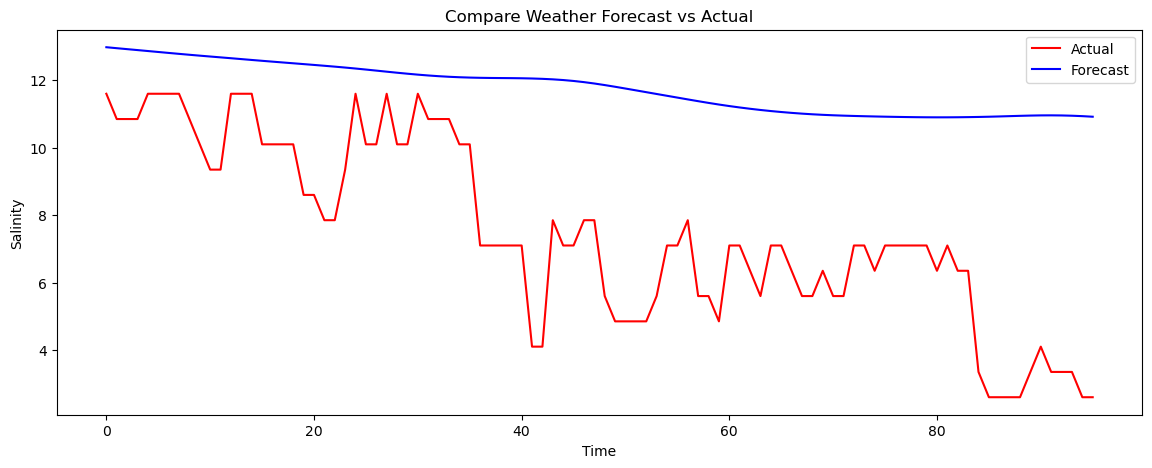

In [53]:
#Visualising the results: Truc quan hoa ket qua
# plt.figure(figsize=(14,5)) #???
# plt.plot(Nhiet_do_y_test, color = 'red', lable = 'Actual')
# plt.plot(Nhiet_do_y_pred, color = 'blue', label = 'Forecast')
# plt.title('Compare between Actual and Forecast Temperature')
# plt.xlabel('Time')
# plt.ylabel('Salinity')
# plt.legend()
# plt.show()

plt.figure(figsize=(14,5))
plt.plot(Nhiet_do_y_test, color = 'red', label = 'Actual')
plt.plot(Nhiet_do_y_pred, color = 'blue', label = 'Forecast')
plt.title('Compare Weather Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

In [31]:
#mean, max, min, range, varience, sd

In [ ]:
#loss figure

### TRAINING WITH PH

In [54]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(PH_X_train, PH_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 6s 84ms/step - loss: 0.0820
Epoch 2/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0149
Epoch 3/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0132
Epoch 4/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0134
Epoch 5/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0133
Epoch 6/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0133
Epoch 7/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0132
Epoch 8/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0133
Epoch 9/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0133
Epoch 10/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0133
Epoch 11/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0133
Epoch 12/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0133
Epoch 13/50
13/13 [==================

In [55]:
LSTM_model.save('PH_LSTM_Model.h5')

In [56]:
PH_LSTM_Model = load_model('PH_LSTM_Model.h5')

In [58]:
PH_y_pred_LSTM_model = LSTM_model.predict(PH_X_test)
PH_y_pred_LSTM_model

3/3 [==============================] - 0s 27ms/step


array([[ 0.01369791],
       [ 0.01367726],
       [ 0.013493  ],
       [ 0.01327767],
       [ 0.01285206],
       [ 0.01215808],
       [ 0.01091041],
       [ 0.00873416],
       [ 0.0056735 ],
       [ 0.00131439],
       [-0.00607037],
       [-0.01656903],
       [-0.02965343],
       [-0.04347275],
       [-0.05639999],
       [-0.06390934],
       [-0.06472556],
       [-0.06007131],
       [-0.05304753],
       [-0.03803917],
       [-0.02493534],
       [-0.01312506],
       [-0.00381709],
       [ 0.00188698],
       [ 0.00514124],
       [ 0.00812538],
       [ 0.0103053 ],
       [ 0.01232851],
       [ 0.01391457],
       [ 0.01502876],
       [ 0.01563656],
       [ 0.01507806],
       [ 0.01351735],
       [ 0.01262191],
       [ 0.01100623],
       [ 0.00629177],
       [-0.00389493],
       [-0.02295943],
       [-0.04744193],
       [-0.07062425],
       [-0.08575758],
       [-0.09016751],
       [-0.085098  ],
       [-0.07246399],
       [-0.05486162],
       [-0

In [59]:
PH_y_pred_LSTM_model = scaler.inverse_transform(PH_y_pred_LSTM_model)
PH_y_pred_LSTM_model


array([[2.7849216],
       [2.784643 ],
       [2.7821555],
       [2.7792485],
       [2.7735028],
       [2.7641342],
       [2.7472904],
       [2.7179112],
       [2.676592 ],
       [2.6177442],
       [2.51805  ],
       [2.3763182],
       [2.1996787],
       [2.0131178],
       [1.8386002],
       [1.737224 ],
       [1.7262049],
       [1.7890373],
       [1.8838584],
       [2.0864713],
       [2.263373 ],
       [2.4228117],
       [2.5484693],
       [2.6254742],
       [2.6694067],
       [2.7096927],
       [2.7391214],
       [2.766435 ],
       [2.7878466],
       [2.8028882],
       [2.8110936],
       [2.8035538],
       [2.7824843],
       [2.7703958],
       [2.7485843],
       [2.684939 ],
       [2.5474184],
       [2.2900476],
       [1.9595339],
       [1.6465726],
       [1.4422727],
       [1.3827386],
       [1.451177 ],
       [1.6217362],
       [1.8593681],
       [2.0924356],
       [2.2811563],
       [2.415676 ],
       [2.5077229],
       [2.571454 ],


In [60]:
PH_y_test.shape = (PH_y_test.size, 1)
PH_y_test = scaler.inverse_transform(PH_y_test)
PH_y_test

array([[12.1625],
       [12.1625],
       [12.1625],
       [14.4125],
       [14.4125],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [12.1625],
       [11.0375],
       [12.1625],
       [11.6   ],
       [11.0375],
       [ 7.6625],
       [ 9.35  ],
       [11.6   ],
       [11.0375],
       [11.6   ],
       [ 8.7875],
       [ 2.6   ],
       [13.2875],
       [13.2875],
       [13.2875],
       [16.1   ],
       [16.1   ],
       [14.4125],
       [14.4125],
       [14.4125],
       [12.725 ],
       [13.2875],
       [13.2875],
       [13.2875],
       [11.0375],
       [12.1625],
       [13.2875],
       [13.2875],
       [13.2875],
       [ 7.1   ],
       [12.1625],
       [11.6   ],
       [12.1625],
       [ 5.975 ],
       [ 3.725 ],
       [ 3.725 ],
       [13.2875],
       [13.2875],
       [13.2875],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13.85  ],
       [13

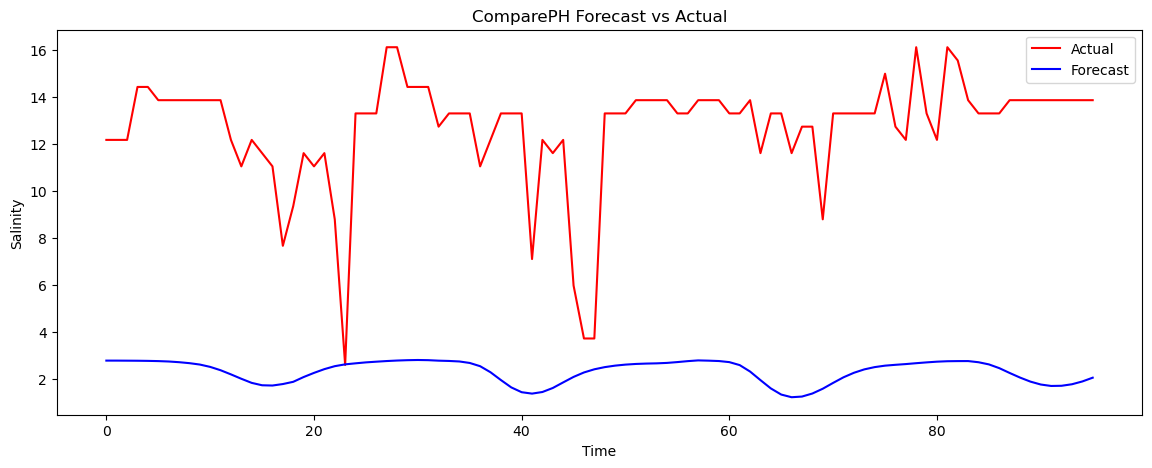

In [61]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(PH_y_test, color = 'red', label = 'Actual')
plt.plot(PH_y_pred_LSTM_model, color = 'blue', label = 'Forecast')
plt.title('ComparePH Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

### TRAINING WITH DO MAN

In [62]:
LSTM_model.compile(optimizer='adam',loss='mean_squared_error')
LSTM_model.fit(Do_man_X_train, Do_man_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 5s 83ms/step - loss: 0.7061
Epoch 2/50
13/13 [==============================] - 1s 85ms/step - loss: 0.1828
Epoch 3/50
13/13 [==============================] - 1s 85ms/step - loss: 0.0768
Epoch 4/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0682
Epoch 5/50
13/13 [==============================] - 1s 85ms/step - loss: 0.0565
Epoch 6/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0542
Epoch 7/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0498
Epoch 8/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0462
Epoch 9/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0488
Epoch 10/50
13/13 [==============================] - 1s 85ms/step - loss: 0.0498
Epoch 11/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0488
Epoch 12/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0452
Epoch 13/50
13/13 [==================

In [63]:
#save Do_man
LSTM_model.save('Do_man.h5')

In [87]:
#train model
Do_man_y_predict_LSTM_model = LSTM_model.predict(Do_man_X_test)
Do_man_y_predict_LSTM_model

3/3 [==============================] - 0s 30ms/step


array([[0.12171249],
       [0.10448623],
       [0.09778275],
       [0.09732721],
       [0.09910893],
       [0.10092716],
       [0.1026524 ],
       [0.10404651],
       [0.10513066],
       [0.1132451 ],
       [0.1369111 ],
       [0.18487239],
       [0.2357324 ],
       [0.26697883],
       [0.26636147],
       [0.23967028],
       [0.20601195],
       [0.17251934],
       [0.14070015],
       [0.11238205],
       [0.09675446],
       [0.09376828],
       [0.09356257],
       [0.09372125],
       [0.09382097],
       [0.09333903],
       [0.09439873],
       [0.09765855],
       [0.1054071 ],
       [0.12611258],
       [0.1728469 ],
       [0.24355245],
       [0.3294188 ],
       [0.41667527],
       [0.47549015],
       [0.46106288],
       [0.35410908],
       [0.23757794],
       [0.16021973],
       [0.11915684],
       [0.10170418],
       [0.09404017],
       [0.09142567],
       [0.09092085],
       [0.09077546],
       [0.09075718],
       [0.09042088],
       [0.089

In [65]:
#convert value predict
Do_man_y_predict_LSTM_model = Do_man.inverse_transform(Do_man_y_predict_LSTM_model)
Do_man_y_predict_LSTM_model

array([[13.889532 ],
       [14.098702 ],
       [14.749435 ],
       [15.550005 ],
       [16.172867 ],
       [16.049568 ],
       [15.60152  ],
       [15.296117 ],
       [15.316827 ],
       [15.3712845],
       [15.380835 ],
       [15.302747 ],
       [15.106393 ],
       [15.048349 ],
       [15.174854 ],
       [15.423941 ],
       [15.650543 ],
       [15.842668 ],
       [15.922942 ],
       [15.888141 ],
       [15.758398 ],
       [15.472216 ],
       [15.02436  ],
       [14.402563 ],
       [13.65664  ],
       [13.133708 ],
       [12.377259 ],
       [11.5825205],
       [10.850137 ],
       [10.610411 ],
       [11.162569 ],
       [12.410118 ],
       [13.743248 ],
       [15.104253 ],
       [15.695115 ],
       [15.96295  ],
       [16.01819  ],
       [15.991933 ],
       [15.700429 ],
       [15.518453 ],
       [15.410287 ],
       [15.319601 ],
       [15.276199 ],
       [15.221822 ],
       [15.163093 ],
       [15.135016 ],
       [15.202664 ],
       [15.31

In [88]:
#convert value test
Do_man_test.shape = (Do_man_test.size,1)
Do_man_y_test = Do_man.inverse_transform(Do_man_y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.6        0.6        0.82857143 0.68571429 0.28571429 0.
 0.17142857 0.54285714 0.37142857 0.02857143 0.02857143 0.11428571
 0.85714286 0.88571429 0.91428571 0.77142857 0.77142857 0.82857143
 0.62857143 0.74285714 0.88571429 0.68571429 0.74285714 0.91428571
 0.28571429 0.68571429 0.85714286 0.45714286 0.51428571 0.
 0.2        0.42857143 0.08571429 0.02857143 0.02857143 0.
 0.88571429 0.91428571 0.94285714 0.97142857 0.97142857 0.97142857
 0.91428571 0.94285714 0.97142857 0.88571429 0.94285714 0.94285714
 0.4        0.77142857 0.68571429 0.42857143 0.82857143 0.82857143
 0.28571429 0.65714286 0.68571429 0.11428571 0.82857143 0.82857143
 0.68571429 0.82857143 0.94285714 0.68571429 0.85714286 0.91428571
 0.6        0.82857143 0.88571429 0.54285714 0.65714286 0.91428571
 0.74285714 0.82857143 0.94285714 0.91428571 0.91428571 0.91428571
 0.91428571 0.91428571 0.94285714 0.68571429 0.91428571 0.94285714].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#visualization result

### NH3

In [69]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(NH3_X_train, NH3_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 6s 85ms/step - loss: 0.1448
Epoch 2/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0209
Epoch 3/50
13/13 [==============================] - 1s 86ms/step - loss: 0.0139
Epoch 4/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0130
Epoch 5/50
13/13 [==============================] - 1s 91ms/step - loss: 0.0132
Epoch 6/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0130
Epoch 7/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0125
Epoch 8/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0126
Epoch 9/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0125
Epoch 10/50
13/13 [==============================] - 1s 101ms/step - loss: 0.0121
Epoch 11/50
13/13 [==============================] - 1s 98ms/step - loss: 0.0122
Epoch 12/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0121
Epoch 13/50
13/13 [=================

In [70]:
LSTM_model.save('NH3_model.h5')

In [83]:
#dao tao mo hinh
NH3_y_predict_LSTM_model = LSTM_model.predict(NH3_X_test)
NH3_y_predict_LSTM_model

3/3 [==============================] - 0s 30ms/step


array([[0.38112813],
       [0.4332541 ],
       [0.47817153],
       [0.3487353 ],
       [0.31443343],
       [0.23070854],
       [0.17324953],
       [0.13999107],
       [0.11443472],
       [0.09904214],
       [0.09075569],
       [0.08449869],
       [0.08138289],
       [0.08055555],
       [0.07981709],
       [0.08063934],
       [0.08201505],
       [0.08401051],
       [0.08622669],
       [0.08800225],
       [0.08840856],
       [0.09239671],
       [0.094357  ],
       [0.09641645],
       [0.10318894],
       [0.13081649],
       [0.16990358],
       [0.20908767],
       [0.2553824 ],
       [0.30228734],
       [0.3546764 ],
       [0.40410724],
       [0.43313605],
       [0.43051666],
       [0.35942778],
       [0.24408641],
       [0.15502332],
       [0.09811772],
       [0.09108327],
       [0.08908654],
       [0.08878917],
       [0.08968264],
       [0.08911029],
       [0.08929139],
       [0.08831805],
       [0.08634116],
       [0.08171226],
       [0.082

In [84]:
NH3_predict_LSTM_model = NH3.inverse_transform(NH3_y_predict_LSTM_model)
NH3_predict_LSTM_model

array([[7.74523  ],
       [8.44893  ],
       [9.055316 ],
       [7.3079267],
       [6.844851 ],
       [5.7145653],
       [4.938869 ],
       [4.4898796],
       [4.144869 ],
       [3.937069 ],
       [3.825202 ],
       [3.7407324],
       [3.6986692],
       [3.6875   ],
       [3.6775308],
       [3.688631 ],
       [3.7072034],
       [3.7341418],
       [3.7640605],
       [3.7880306],
       [3.7935154],
       [3.8473556],
       [3.8738196],
       [3.901622 ],
       [3.9930506],
       [4.3660226],
       [4.893698 ],
       [5.4226837],
       [6.0476623],
       [6.680879 ],
       [7.388131 ],
       [8.055448 ],
       [8.447337 ],
       [8.411975 ],
       [7.452275 ],
       [5.8951664],
       [4.692815 ],
       [3.9245892],
       [3.8296244],
       [3.802668 ],
       [3.7986536],
       [3.8107157],
       [3.8029888],
       [3.8054338],
       [3.7922935],
       [3.765606 ],
       [3.7031157],
       [3.715294 ],
       [3.7888043],
       [4.025998 ],


In [85]:
#convert y_test
NH3_y_test.shape = (NH3_y_test.size, 1)
NH3_y_test = NH3.inverse_transform(NH3_y_test)
NH3_y_test

array([[14851.25733696],
       [17017.45706522],
       [10518.85788043],
       [ 6908.525     ],
       [ 6908.525     ],
       [ 6908.525     ],
       [ 6908.525     ],
       [ 6908.525     ],
       [12685.0576087 ],
       [11240.92445652],
       [11962.99103261],
       [12685.0576087 ],
       [ 7630.59157609],
       [11962.99103261],
       [ 9796.79130435],
       [12685.0576087 ],
       [ 8352.65815217],
       [ 7630.59157609],
       [ 9074.72472826],
       [ 6908.525     ],
       [25682.25597826],
       [24238.12282609],
       [33624.98831522],
       [31458.78858696],
       [13407.12418478],
       [14851.25733696],
       [ 9796.79130435],
       [ 7630.59157609],
       [ 8352.65815217],
       [ 6908.525     ],
       [ 7630.59157609],
       [ 7630.59157609],
       [ 6908.525     ],
       [ 7630.59157609],
       [ 8352.65815217],
       [ 6908.525     ],
       [ 8352.65815217],
       [11240.92445652],
       [ 9796.79130435],
       [11240.92445652],


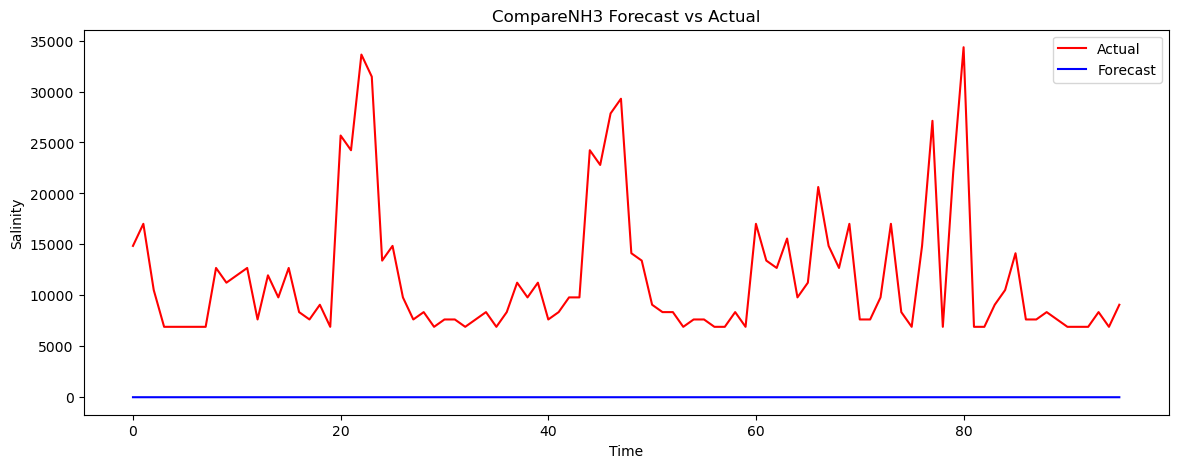

In [86]:
#visualazation the result
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(NH3_y_test, color = 'red', label = 'Actual')
plt.plot(NH3_y_predict_LSTM_model, color = 'blue', label = 'Forecast')
plt.title('CompareNH3 Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

### H2S

In [80]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(H2S_X_train, H2S_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 5s 94ms/step - loss: 0.0368
Epoch 2/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0316
Epoch 3/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0284
Epoch 4/50
13/13 [==============================] - 1s 92ms/step - loss: 0.0263
Epoch 5/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0255
Epoch 6/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0247
Epoch 7/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0251
Epoch 8/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0229
Epoch 9/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0232
Epoch 10/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0232
Epoch 11/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0220
Epoch 12/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0230
Epoch 13/50
13/13 [==================

In [81]:
LSTM_model.save('H2S_model.h5')

In [89]:
H2S_predict_LSTM_model = LSTM_model.predict(H2S_X_test)
H2S_predict_LSTM_model

3/3 [==============================] - 0s 27ms/step


array([[0.35507706],
       [0.28998896],
       [0.19549462],
       [0.13072293],
       [0.09270673],
       [0.08307259],
       [0.08037801],
       [0.07841223],
       [0.07710482],
       [0.07598332],
       [0.07489721],
       [0.07411016],
       [0.07300127],
       [0.07255706],
       [0.07244923],
       [0.07324881],
       [0.07375275],
       [0.07539562],
       [0.07863001],
       [0.08347287],
       [0.09369253],
       [0.10835753],
       [0.11970393],
       [0.13870493],
       [0.16345838],
       [0.21698406],
       [0.2820374 ],
       [0.34657276],
       [0.41576868],
       [0.48252246],
       [0.5140351 ],
       [0.45649508],
       [0.33211097],
       [0.22361776],
       [0.1655848 ],
       [0.13182676],
       [0.10643451],
       [0.09480552],
       [0.09363781],
       [0.09612487],
       [0.10179229],
       [0.11263637],
       [0.1158976 ],
       [0.11697082],
       [0.11650676],
       [0.11363918],
       [0.10792366],
       [0.104

In [112]:
H2S_predict_LSTM_model = H2S.inverse_transform(H2S_predict_LSTM_model)
H2S_predict_LSTM_model

array([[1.68620146e+21],
       [1.49128764e+21],
       [1.20831254e+21],
       [1.01434610e+21],
       [9.00502205e+20],
       [8.71651512e+20],
       [8.63582258e+20],
       [8.57695490e+20],
       [8.53780455e+20],
       [8.50421966e+20],
       [8.47169593e+20],
       [8.44812451e+20],
       [8.41491750e+20],
       [8.40161569e+20],
       [8.39838647e+20],
       [8.42233084e+20],
       [8.43742072e+20],
       [8.48661832e+20],
       [8.58347808e+20],
       [8.72850244e+20],
       [9.03454173e+20],
       [9.47370321e+20],
       [9.81348503e+20],
       [1.03824916e+21],
       [1.11237658e+21],
       [1.27266546e+21],
       [1.46747542e+21],
       [1.66073445e+21],
       [1.86794985e+21],
       [2.06785184e+21],
       [2.16222040e+21],
       [1.98990958e+21],
       [1.61742699e+21],
       [1.29253084e+21],
       [1.11874411e+21],
       [1.01765167e+21],
       [9.41611695e+20],
       [9.06787189e+20],
       [9.03290355e+20],
       [9.10738183e+20],


In [133]:
H2S_y_test.shape = (H2S_y_test.size, 1)
H2S_y_test = H2S.inverse_transform(H2S_y_test)
H2S_y_test

array([[1.13520024e+23],
       [1.81741192e+23],
       [2.04481581e+23],
       [1.13520024e+23],
       [1.81741192e+23],
       [2.49962360e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [2.27221971e+23],
       [1.13520024e+23],
       [1.59000803e+23],
       [2.27221971e+23],
       [4.09145086e+23],
       [3.40923918e+23],
       [1.81741192e+23],
       [3.63664307e+23],
       [2.72702749e+23],
       [5.00106643e+23],
       [5.68327811e+23],
       [6.59289369e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [3.18183528e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.81741192e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [1.13520024e+23],
       [3.18183528e+23],
       [1.81741192e+23],
       [1.36260413e+23],
       [1.13520024e+23],


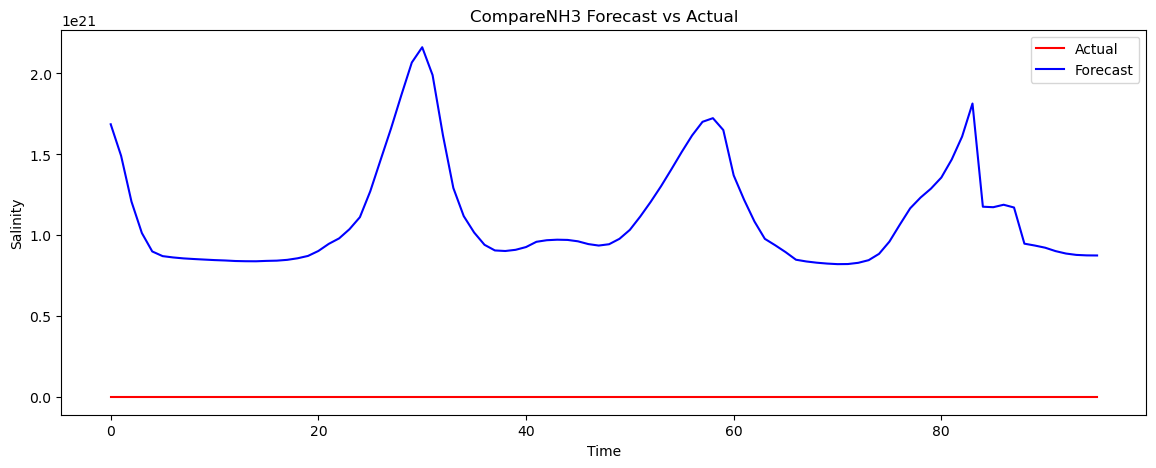

In [120]:
#visualization the result
#visualazation the result
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(H2S_y_test, color = 'red', label = 'Actual')
plt.plot(H2S_predict_LSTM_model, color = 'blue', label = 'Forecast')
plt.title('CompareNH3 Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

### TSS

In [146]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(TSS_X_train, TSS_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 5s 86ms/step - loss: 0.0379
Epoch 2/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0283
Epoch 3/50
13/13 [==============================] - 1s 91ms/step - loss: 0.0271
Epoch 4/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0268
Epoch 5/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0265
Epoch 6/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0253
Epoch 7/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0257
Epoch 8/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0259
Epoch 9/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0252
Epoch 10/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0258
Epoch 11/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0251
Epoch 12/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0258
Epoch 13/50
13/13 [==================

In [148]:
LSTM_model.save('TSS_model.h5')

In [150]:
TSS_predict_LSTM_model = LSTM_model.predict(TSS_X_test)
TSS_predict_LSTM_model

3/3 [==============================] - 1s 26ms/step


array([[0.3207208 ],
       [0.3206673 ],
       [0.32068363],
       [0.3206195 ],
       [0.32039565],
       [0.31996796],
       [0.319751  ],
       [0.3198822 ],
       [0.32030094],
       [0.32098696],
       [0.32140943],
       [0.32157028],
       [0.3214936 ],
       [0.32120728],
       [0.3206501 ],
       [0.31991982],
       [0.31910825],
       [0.31823322],
       [0.3173948 ],
       [0.31667614],
       [0.316144  ],
       [0.3157954 ],
       [0.31563738],
       [0.3155011 ],
       [0.3154487 ],
       [0.31537476],
       [0.31538352],
       [0.31544617],
       [0.31565174],
       [0.31615105],
       [0.31673217],
       [0.31734324],
       [0.31786454],
       [0.31822437],
       [0.3184206 ],
       [0.3187075 ],
       [0.31917474],
       [0.31985977],
       [0.3204669 ],
       [0.3210089 ],
       [0.32145005],
       [0.32167444],
       [0.32167062],
       [0.32152018],
       [0.32130188],
       [0.32101196],
       [0.32057396],
       [0.319

In [173]:
TSS_predict_LSTM_mode = TSS.inverse_transform(TSS_predict_LSTM_model)
TSS_predict_LSTM_mode

array([[1.4351519e+12],
       [1.4350067e+12],
       [1.4350511e+12],
       [1.4348768e+12],
       [1.4342693e+12],
       [1.4331085e+12],
       [1.4325196e+12],
       [1.4328757e+12],
       [1.4340122e+12],
       [1.4358745e+12],
       [1.4370211e+12],
       [1.4374578e+12],
       [1.4372493e+12],
       [1.4364727e+12],
       [1.4349600e+12],
       [1.4329775e+12],
       [1.4307749e+12],
       [1.4283997e+12],
       [1.4261237e+12],
       [1.4241732e+12],
       [1.4227286e+12],
       [1.4217823e+12],
       [1.4213535e+12],
       [1.4209835e+12],
       [1.4208415e+12],
       [1.4206405e+12],
       [1.4206645e+12],
       [1.4208344e+12],
       [1.4213925e+12],
       [1.4227476e+12],
       [1.4243252e+12],
       [1.4259841e+12],
       [1.4273989e+12],
       [1.4283757e+12],
       [1.4289084e+12],
       [1.4296867e+12],
       [1.4309552e+12],
       [1.4328147e+12],
       [1.4344627e+12],
       [1.4359339e+12],
       [1.4371316e+12],
       [1.437740

In [174]:
TSS_y_test.shape = (TSS_y_test.size,1)
TSS_y_tes = TSS.inverse_transform(TSS_y_test)
TSS_y_tes

array([[ 7.77808219],
       [12.03150685],
       [ 7.31575342],
       [ 6.39109589],
       [ 3.80205479],
       [ 7.31575342],
       [ 4.44931507],
       [10.27465753],
       [ 8.70273973],
       [ 7.50068493],
       [10.7369863 ],
       [ 4.81917808],
       [ 6.85342466],
       [ 7.87054795],
       [ 6.7609589 ],
       [ 9.44246575],
       [ 5.46643836],
       [ 5.65136986],
       [ 6.29863014],
       [ 6.85342466],
       [ 9.71986301],
       [ 9.16506849],
       [ 9.81232877],
       [ 9.53493151],
       [ 6.85342466],
       [ 7.31575342],
       [ 6.48356164],
       [13.69589041],
       [ 8.24041096],
       [ 6.85342466],
       [ 7.87054795],
       [ 8.51780822],
       [ 7.50068493],
       [ 7.68561644],
       [ 9.71986301],
       [ 5.46643836],
       [ 7.03835616],
       [ 8.33287671],
       [ 6.48356164],
       [ 8.79520548],
       [ 5.09657534],
       [ 5.28150685],
       [ 7.13082192],
       [ 6.66849315],
       [10.92191781],
       [10

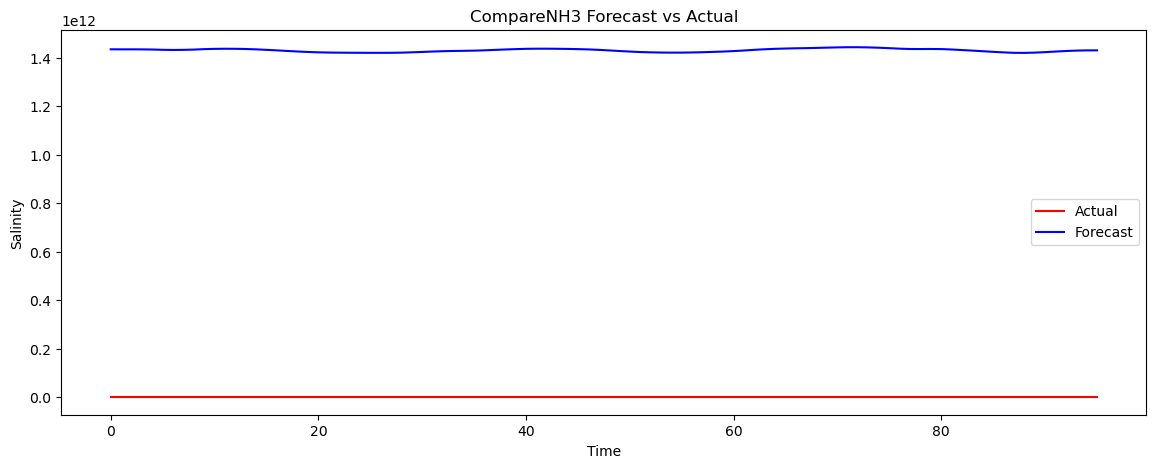

In [175]:
#visualization the result
#visualazation the result
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(TSS_y_test, color = 'red', label = 'Actual')
plt.plot(TSS_predict_LSTM_mode, color = 'blue', label = 'Forecast')
plt.title('CompareNH3 Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

### DO

In [176]:
#compile model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(DO_X_train, DO_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 6s 85ms/step - loss: 0.0345
Epoch 2/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0041
Epoch 3/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0026
Epoch 4/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 5/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0024
Epoch 6/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0024
Epoch 7/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 8/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 9/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 10/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 11/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0024
Epoch 12/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0024
Epoch 13/50
13/13 [==================

In [177]:
LSTM_model.save('DO_model.h5')

In [181]:
DO_predict_LSTM_model = LSTM_model.predict(DO_X_test)
DO_predict_LSTM_mode = DO.inverse_transform(DO_predict_LSTM_model)
DO_predict_LSTM_mode

3/3 [==============================] - 0s 32ms/step


array([[    3.7123456],
       [    3.7127635],
       [    3.7124803],
       [    3.7114484],
       [    3.7066941],
       [    3.701177 ],
       [    3.697449 ],
       [    3.6948104],
       [    3.694114 ],
       [    3.6938415],
       [    3.6943722],
       [    3.6953003],
       [    3.6967077],
       [    3.6969585],
       [    3.697143 ],
       [    3.697788 ],
       [    3.7002869],
       [    3.7021887],
       [    3.706019 ],
       [    3.7079859],
       [    3.7085178],
       [    3.7068615],
       [    3.70191  ],
       [    3.697418 ],
       [    3.693916 ],
       [    3.6910374],
       [    3.6903987],
       [    3.690573 ],
       [    3.689788 ],
       [    3.6894062],
       [    3.6893656],
       [    3.6875885],
       [    3.6863909],
       [    3.6848285],
       [    3.6790433],
       [    3.6710298],
       [    3.6670663],
       [    3.6683748],
       [    3.670011 ],
       [    3.6711113],
       [    3.6788049],
       [    3.68

In [179]:
DO_y_test.shape = (DO_y_test.size, 1)
DO_y_tes = DO.inverse_transform(DO_y_test)
DO_y_tes

array([[10.3625],
       [ 5.975 ],
       [ 4.9625],
       [11.375 ],
       [ 8.675 ],
       [ 5.975 ],
       [10.3625],
       [ 8.3375],
       [ 8.    ],
       [12.05  ],
       [11.7125],
       [11.0375],
       [14.75  ],
       [ 6.65  ],
       [ 9.6875],
       [12.05  ],
       [15.425 ],
       [11.7125],
       [14.4125],
       [13.7375],
       [14.4125],
       [ 5.6375],
       [ 5.3   ],
       [11.0375],
       [15.425 ],
       [ 9.35  ],
       [ 9.0125],
       [15.425 ],
       [14.4125],
       [13.0625],
       [15.425 ],
       [13.4   ],
       [ 3.6125],
       [13.0625],
       [12.05  ],
       [ 8.675 ],
       [15.425 ],
       [15.425 ],
       [13.7375],
       [15.425 ],
       [16.1   ],
       [13.0625],
       [16.1   ],
       [13.0625],
       [15.425 ],
       [12.3875],
       [13.7375],
       [ 8.675 ],
       [15.425 ],
       [14.75  ],
       [13.7375],
       [12.725 ],
       [12.3875],
       [11.0375],
       [13.0625],
       [12

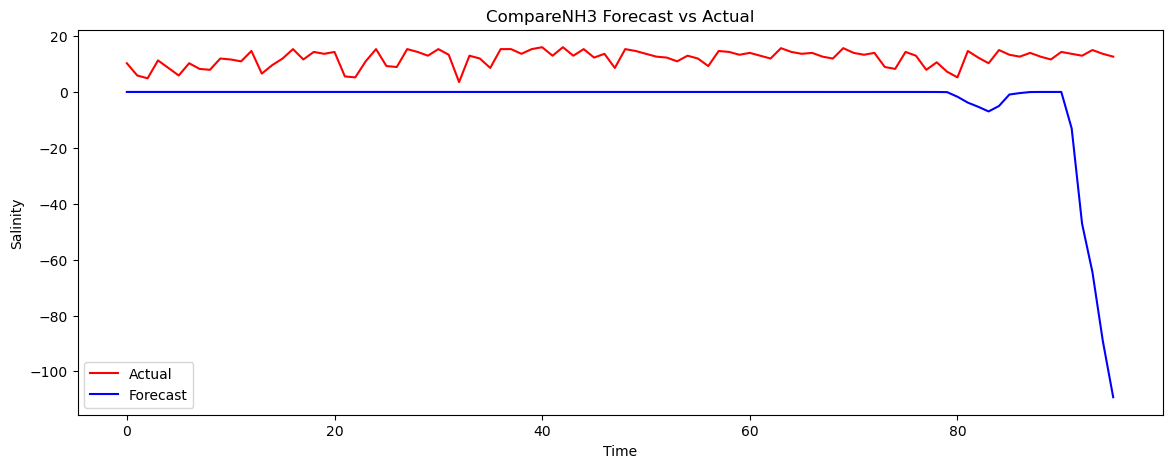

In [182]:
#visualize the result

plt.figure(figsize=(14,5))
plt.plot(DO_y_tes, color = 'red', label = 'Actual')
plt.plot(DO_predict_LSTM_model, color = 'blue', label = 'Forecast')
plt.title('CompareNH3 Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()

### COD

In [185]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(COD_X_train, COD_y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 5s 98ms/step - loss: 0.0460
Epoch 2/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0273
Epoch 3/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0254
Epoch 4/50
13/13 [==============================] - 1s 91ms/step - loss: 0.0231
Epoch 5/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0217
Epoch 6/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0206
Epoch 7/50
13/13 [==============================] - 1s 91ms/step - loss: 0.0204
Epoch 8/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0207
Epoch 9/50
13/13 [==============================] - 1s 89ms/step - loss: 0.0197
Epoch 10/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0198
Epoch 11/50
13/13 [==============================] - 1s 92ms/step - loss: 0.0185
Epoch 12/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0193
Epoch 13/50
13/13 [==================

In [186]:
LSTM_model.save('COD_model.h5')

In [187]:
COD_predict_LSTM_model = LSTM_model.predict(COD_X_test)
COD_predict_LSTM_mode = COD.inverse_transform(COD_predict_LSTM_model)
COD_predict_LSTM_mode

3/3 [==============================] - 1s 29ms/step


array([[ 5.627441 ],
       [ 4.237426 ],
       [ 4.0936313],
       [ 5.2451873],
       [ 6.0637174],
       [ 6.3149395],
       [ 6.2117004],
       [ 5.8411765],
       [ 5.4426513],
       [ 5.1232357],
       [ 4.8705482],
       [ 4.7166767],
       [ 4.6650953],
       [ 4.7033153],
       [ 4.8443336],
       [ 5.0375605],
       [ 5.2628717],
       [ 5.4363003],
       [ 5.505385 ],
       [ 5.551095 ],
       [ 5.5576863],
       [ 5.486441 ],
       [ 5.362601 ],
       [ 5.37707  ],
       [ 5.4864435],
       [ 5.6556416],
       [ 5.9147534],
       [ 5.954207 ],
       [ 5.769962 ],
       [ 5.8655043],
       [ 5.699906 ],
       [ 5.533812 ],
       [ 5.264529 ],
       [ 5.0685368],
       [ 4.931546 ],
       [ 4.8947334],
       [ 4.859622 ],
       [ 4.8512836],
       [ 4.8661594],
       [ 4.9120207],
       [ 4.962888 ],
       [ 5.0106874],
       [ 5.0494165],
       [ 5.0697374],
       [ 5.094548 ],
       [ 5.109297 ],
       [ 5.163899 ],
       [ 5.20

In [188]:
COD_y_test.shape = (COD_y_test.size, 1)
COD_y_tes = COD.inverse_transform(COD_y_test)
COD_y_tes

array([[ 3.8],
       [ 3.6],
       [ 3.1],
       [ 3.8],
       [ 5.8],
       [ 5.1],
       [ 6.1],
       [ 5.1],
       [ 4.6],
       [ 3.1],
       [ 4.9],
       [ 3.8],
       [ 5.9],
       [ 7.7],
       [ 6.9],
       [ 5.4],
       [ 5.9],
       [10.5],
       [ 7.8],
       [15.9],
       [ 8.2],
       [16.1],
       [12. ],
       [10.8],
       [ 6.4],
       [ 7.2],
       [ 6.4],
       [ 7.7],
       [ 7.9],
       [ 6.9],
       [ 7.4],
       [ 6.9],
       [ 6.4],
       [ 5.1],
       [ 4.4],
       [ 4.6],
       [ 8.2],
       [ 7.2],
       [ 6.7],
       [ 5.1],
       [ 5.4],
       [ 8.4],
       [ 9.2],
       [ 7.2],
       [ 8.7],
       [10.2],
       [15.4],
       [11.3],
       [ 7.4],
       [ 7.7],
       [ 7.2],
       [ 3.6],
       [ 4.1],
       [ 3.1],
       [ 4.1],
       [ 4.6],
       [ 3.8],
       [ 4.6],
       [ 3.6],
       [ 3.8],
       [ 7.2],
       [ 5.6],
       [ 6.7],
       [ 5.6],
       [ 5.1],
       [ 4.1],
       [ 5

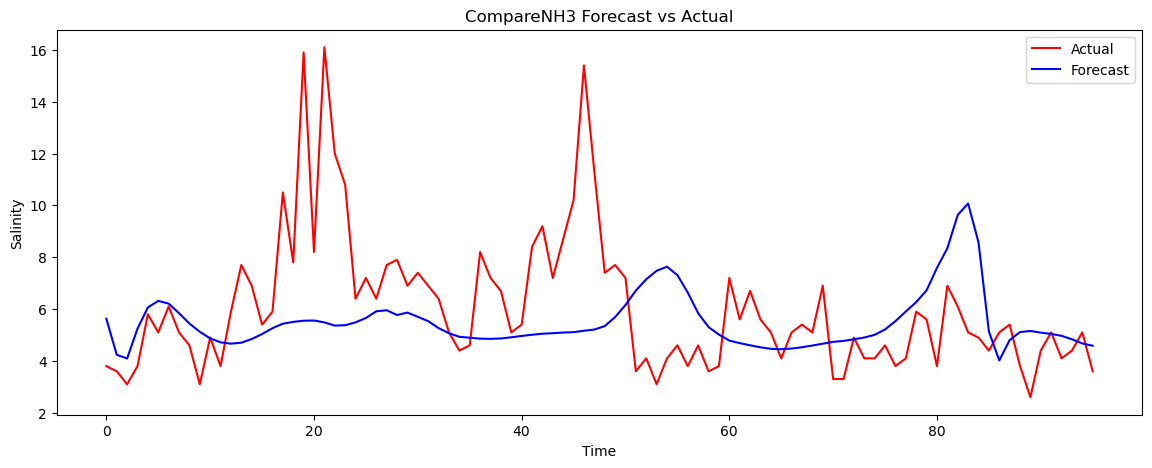

In [189]:
#visulize the result
plt.figure(figsize=(14,5))
plt.plot(COD_y_tes, color = 'red', label = 'Actual')
plt.plot(COD_predict_LSTM_mode, color = 'blue', label = 'Forecast')
plt.title('CompareNH3 Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()
plt.show()